In [1]:
from numpy import *

x  = random.pareto(1.7, (2,3))
print(x)

[[3.05258596 1.56068245 1.37949548]
 [0.16634415 0.20238323 0.39198395]]


C:\Users\Dell\AppData\Local\Temp\ipykernel_12420\1472897337.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(random.pareto(1.7, 1000), kde=False)


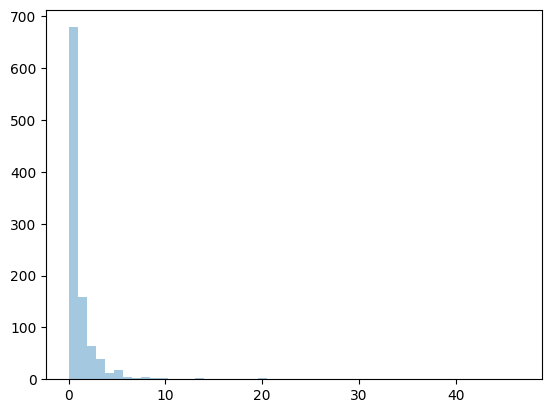

In [2]:
# visualize
import matplotlib.pyplot as plt
import seaborn as sns

sns.distplot(random.pareto(1.7, 1000), kde=False)
plt.show()

(1.3526993875619797, 0, 45)
Shape: 1.3526993875619797, Location: 0, Scale: 45
The mean income is: $127.59
The probability that an individual earns more than $50,000 is: 86.72%


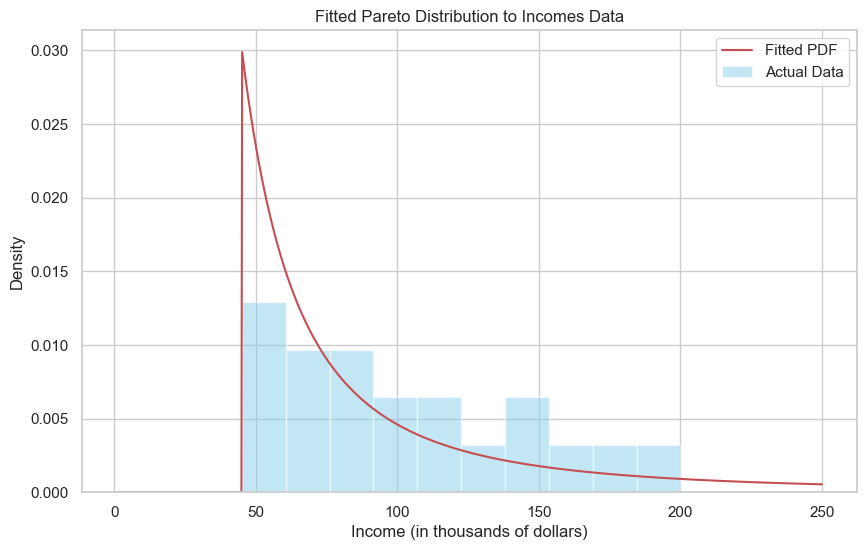

In [19]:
# Given a dataset of incomes in thousands of dollars for a particular region, fit the data to a Pareto distribution. Then, using the fitted parameters, answer the following:

# What is the mean income in this region according to the Pareto distribution?
# What is the probability that an individual earns more than $50,000?
# You can use the following dataset for incomes (in thousands of dollars):

# incomes = [45, 60, 75, 90, 120, 150, 200, 50, 65, 80, 95, 110, 130, 160, 180, 55, 70, 85, 100, 140]
# Solution

from scipy.stats import pareto
import numpy as np
incomes = array([45, 60, 75, 90, 120, 150, 200, 50, 65, 80, 95, 110, 130, 160, 180, 55, 70, 85, 100, 140])

# Fit the data to a Pareto distribution
params = pareto.fit(incomes, floc=0)
print(params)
fitted_shape = params[0]
fitted_loc = params[1]
fitted_scale = params[2]

print(f"Shape: {fitted_shape}, Location: {fitted_loc}, Scale: {fitted_scale}")

# Calculate the mean income
mean_income = fitted_scale / (fitted_shape - 1)
print(f"The mean income is: ${mean_income:,.2f}")

prob_more_than_50k = 1 - pareto.cdf(50, fitted_shape, loc=fitted_loc, scale=fitted_scale)
print(f"The probability that an individual earns more than $50,000 is: {prob_more_than_50k:.2%}")

# plot the fitted distribution
x = np.linspace(1, 250, 1000)
fitted_pdf = pareto.pdf(x, fitted_shape, loc=fitted_loc, scale=fitted_scale)

sns.set_theme(style='whitegrid')
plt.figure(figsize=(10, 6))
plt.plot(x, fitted_pdf, 'r-', label='Fitted PDF')
plt.hist(incomes, bins=10, density=True, alpha=0.5, label='Actual Data', color='skyblue')
plt.title('Fitted Pareto Distribution to Incomes Data')
plt.xlabel('Income (in thousands of dollars)')
plt.ylabel('Density')
plt.legend()
plt.show()
